# Perceptron Algorithm

In [26]:
import pandas 
import numpy as np
from matplotlib import pyplot

Load data and plot it


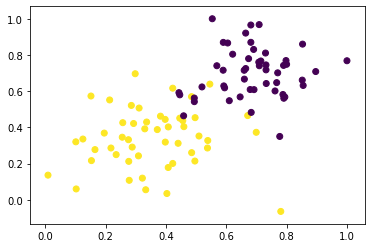

In [27]:
dt = pandas.read_csv('data.csv')
pyplot.scatter(dt["x0"],dt["x1"],c=dt["label"])

predection functions 

In [28]:
def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

Calculate single learning step

x = data x0,x1 

y = label 0 or 1

W = wight w0, w1 

b = bias 


In [29]:
def perceptronStep(X, y, W, b, learn_rate = 0.01): 

    for i in range(len(X)):
        predect = prediction(X[i],W,b)
        direction = y[i] - predect
        if predect is not y[i]:
            W[0]+=X[i][0]*learn_rate*direction
            W[1]+=X[i][1]*learn_rate*direction
            b+=learn_rate*direction
    return W, b

This function runs the perceptron algorithm repeatedly on the dataset,
and returns a few of the boundary lines obtained in the iterations,
for plotting purposes.
Feel free to play with the learning rate and the num_epochs,
and see your results plotted below.

In [30]:
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines

In [31]:
X=dt[dt.columns[0:2]].to_numpy()
boundary = trainPerceptronAlgorithm(X, dt["label"])

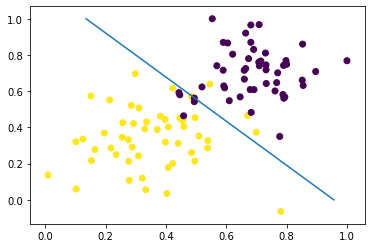

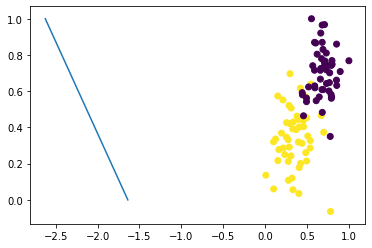

In [39]:
def buildline (boundary):
    x0=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
    x1=[]
    for i in range(len(x0)):
        x1.append(x0[i]*boundary[0]+boundary[1])
    pyplot.figure()
    pyplot.scatter(dt["x0"],dt["x1"],c=dt["label"])
    pyplot.plot(x1,x0)
    pyplot.close


buildline(boundary[len(boundary)-1])
buildline(boundary[0])


diff [0] =  [0.2485448]
diff [1] =  [5.57750105]


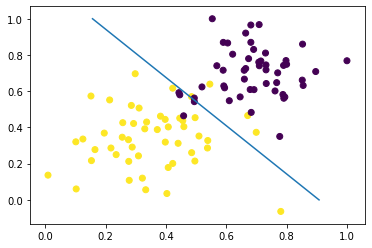

In [45]:
X=dt[dt.columns[0:2]].to_numpy()
boundary = trainPerceptronAlgorithm(X, dt["label"], learn_rate=0.01, num_epochs=50)
buildline(boundary[len(boundary)-1])
diff0 = boundary[0][0] - boundary[len(boundary)-1][0]
diff1 = boundary[0][1] - boundary[len(boundary)-1][1]
print("diff [0] = ",diff0)
print("diff [1] = ",diff1)
